In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data_violences_conjugales_province_sud.csv")
df['Date du contact'] = pd.to_datetime(df['Date du contact'], format='%Y-%m')

print(f"shape: {df.shape}")
print(f"columns: {df.columns}")
df.head()

shape: (5636, 15)
columns: Index(['Sexe', 'Année de naissance', 'Commune', 'Situation familiale',
       'Habitat', 'Catégorie socioprofessionnelle', 'Nationalité',
       'Nombre d'enfant(s)', 'Date du contact', '1er contact', 'Motif',
       'Violences', 'Produits addictifs', 'Envoyé(e) par institution',
       'age_contact'],
      dtype='object')


,Sexe,Année de naissance,Commune,Situation familiale,Habitat,Catégorie socioprofessionnelle,Nationalité,Nombre d'enfant(s),Date du contact,1er contact,Motif,Violences,Produits addictifs,Envoyé(e) par institution,age_contact
0,M,NaN,Nouméa,Union libre,NaN,NaN,FRANCAISE,1.0,2022-04-01,True,Auteur,Physiques,NaN,Service pénitentiaire d'insertion et de probat...,0.0
1,F,NaN,Nouméa,Célibataire,Hébergé,Employé-e,NaN,4.0,2021-07-01,True,Mixte,"Verbales,Psychologiques,Physiques",NaN,Associations,0.0
2,F,NaN,Nouméa,Séparé(e),Hébergé,Sans Emploi,NaN,1.0,2020-10-01,True,Mixte,Physiques,NaN,Entourage,0.0
3,M,NaN,Bourail,Union libre,Hébergé,NaN,NaN,2.0,2020-01-01,True,Auteur,"Verbales,Psychologiques,Physiques",NaN,Entourage,0.0
4,M,NaN,Paita,Séparé(e),NaN,NaN,NaN,5.0,2023-10-01,True,Auteur,"Psychologiques,Physiques",NaN,Service pénitentiaire d'insertion et de probat...,4.0


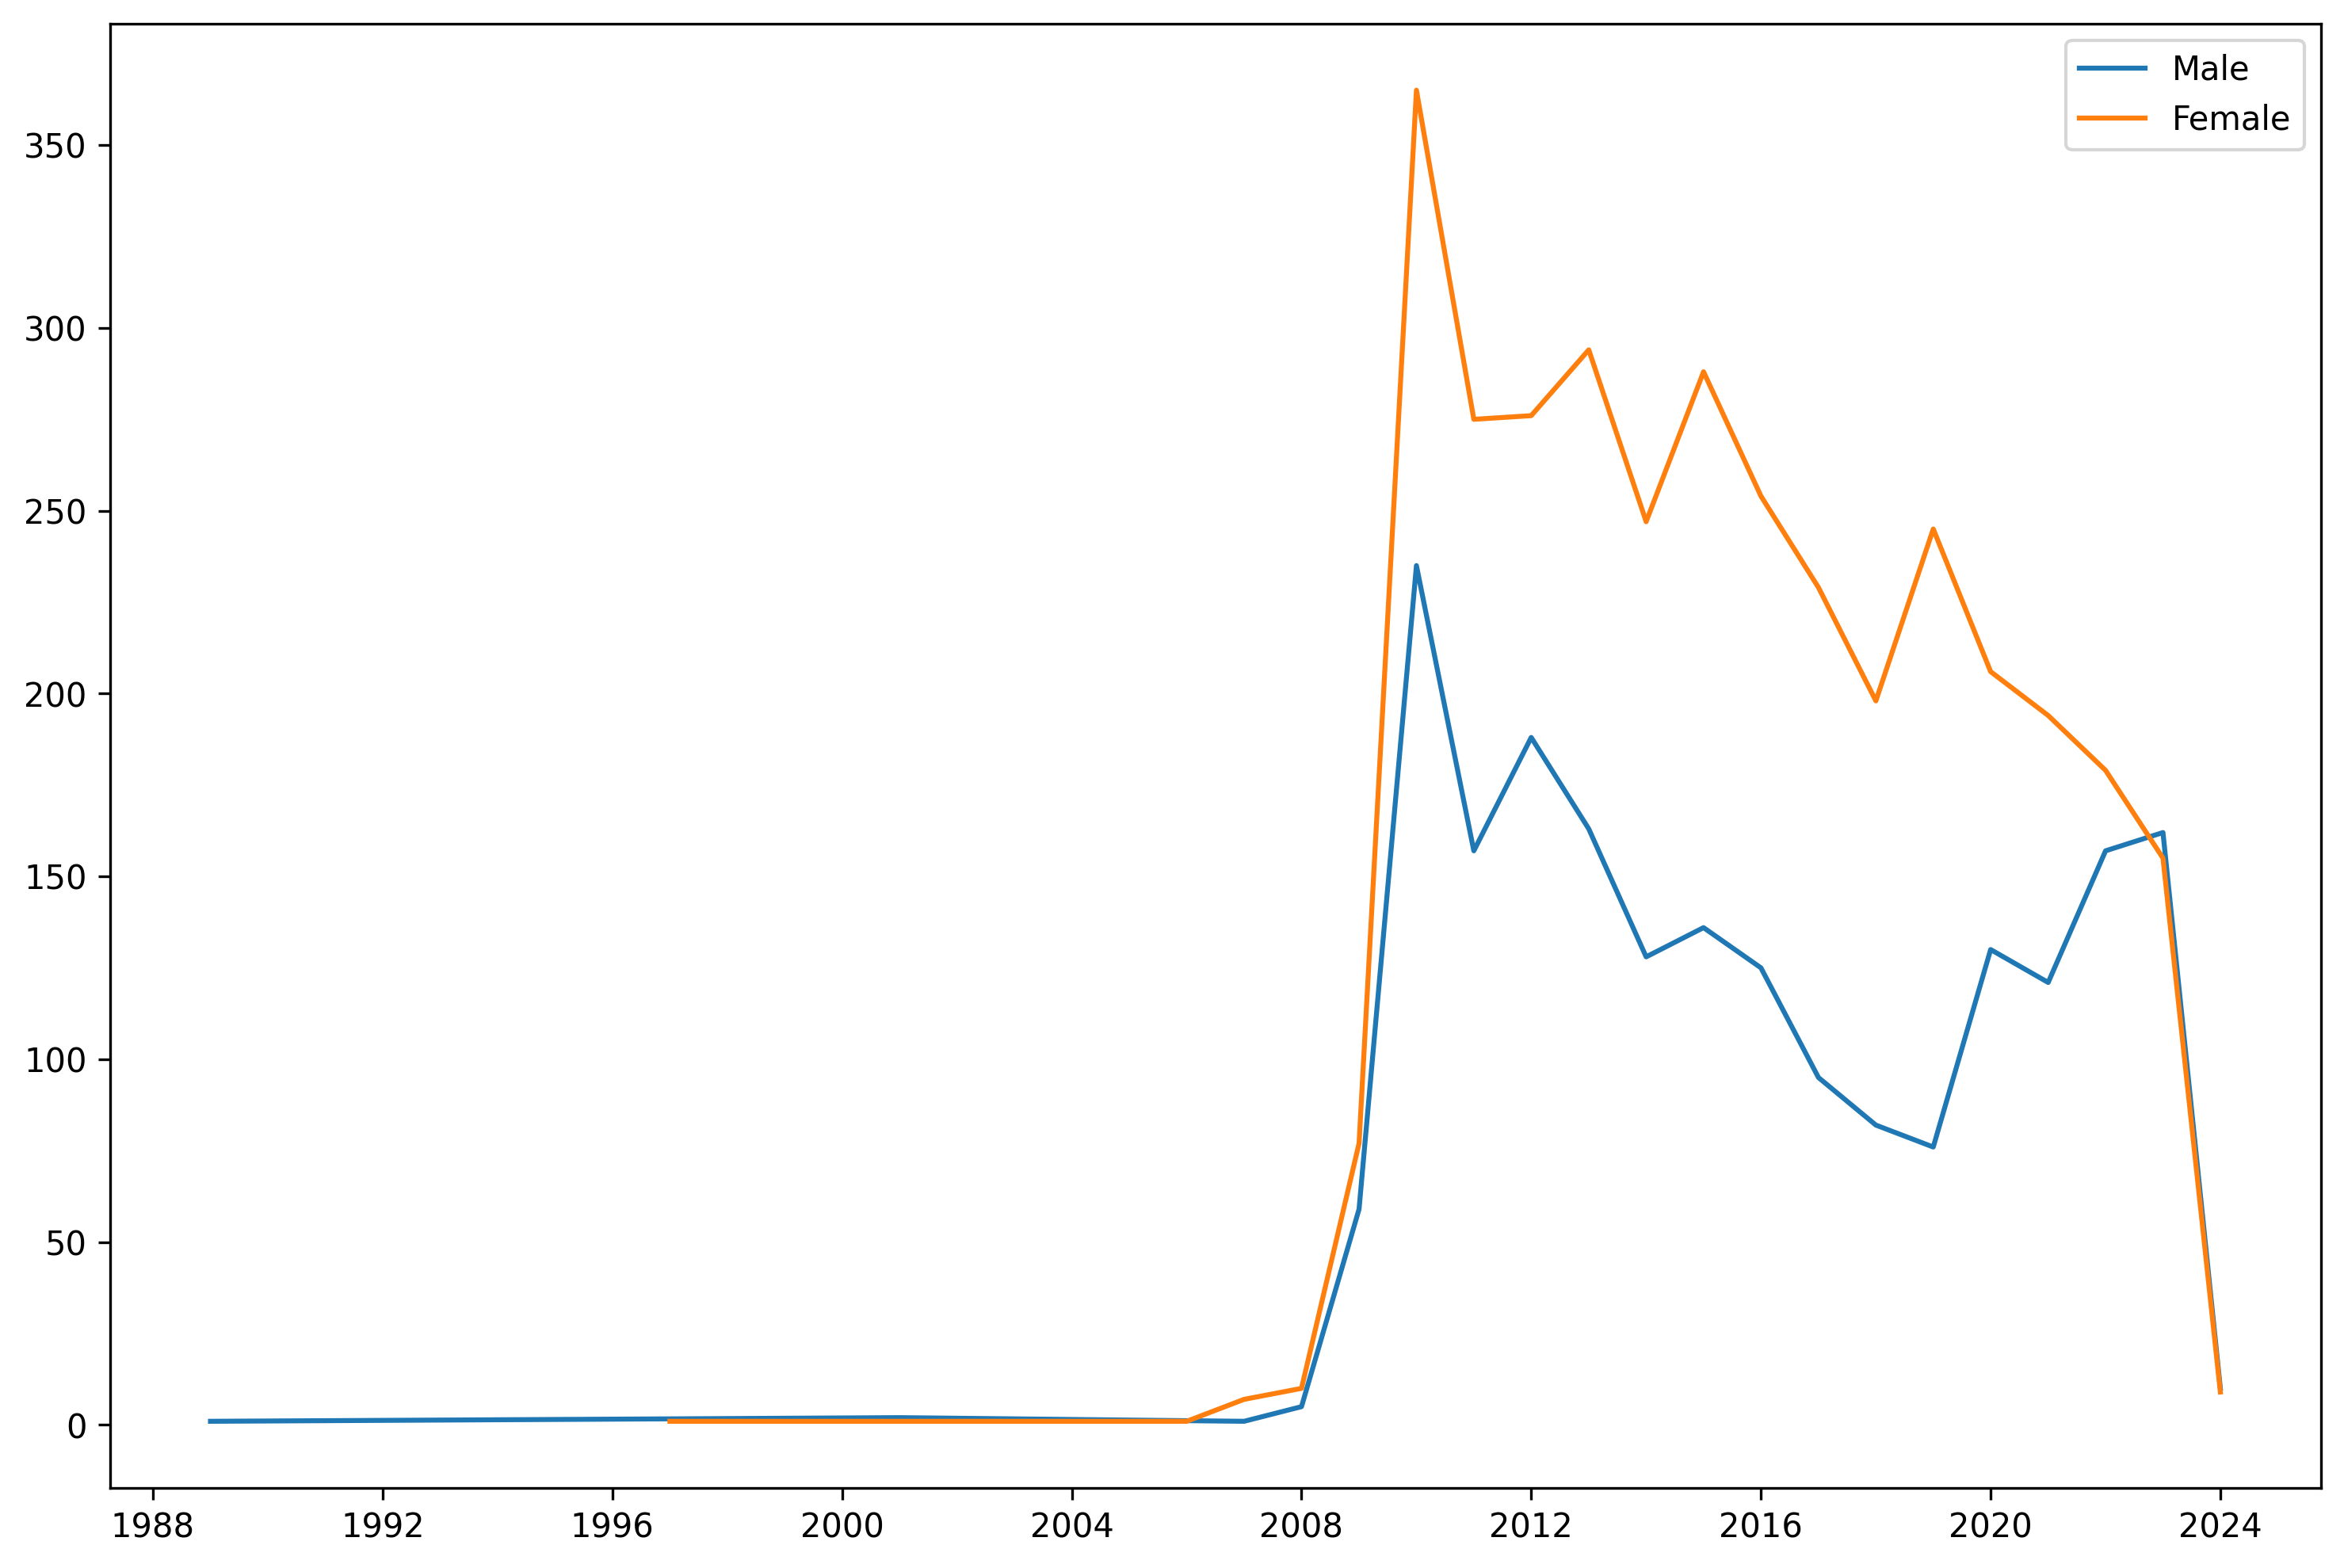

In [17]:
df['year'] = df['Date du contact'].dt.to_period('Y')

data_m_yearly = df[df['Sexe'] == 'M'].groupby('year').size().reset_index(name='event_count')
data_f_yearly = df[df['Sexe'] == 'F'].groupby('year').size().reset_index(name='event_count')

data_m_yearly['date'] = data_m_yearly['year'].dt.to_timestamp()
data_f_yearly['date'] = data_f_yearly['year'].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

ax.plot(data_m_yearly['date'], data_m_yearly['event_count'], label='Male')
ax.plot(data_f_yearly['date'], data_f_yearly['event_count'], label='Female')

ax.legend()
plt.show()


In [2]:
df.dtypes

Sexe                                      object
Année de naissance                       float64
Commune                                   object
Situation familiale                       object
Habitat                                   object
Catégorie socioprofessionnelle            object
Nationalité                               object
Nombre d'enfant(s)                       float64
Date du contact                   datetime64[ns]
1er contact                                 bool
Motif                                     object
Violences                                 object
Produits addictifs                        object
Envoyé(e) par institution                 object
age_contact                              float64
dtype: object